In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from evaluator import *

In [2]:
# Load pickle file and convert to numpy array
with open('data-challenge-student.pickle', 'rb') as handle:
    # dat = pickle.load(handle)
    dat = pd.read_pickle(handle)
 
#Check keys()
print(dat.keys())
X = dat['X_train']
Y = dat['Y']
S = dat['S_train']

X_test_true = dat['X_test']
S_test_true = dat['S_test']

#X, X_test,Y,S, S_test = dat[1]

print(X.shape,Y.shape,S.shape,X_test_true.shape,S_test_true.shape)

dict_keys(['X_train', 'X_test', 'Y', 'S_train', 'S_test'])
(27749, 768) (27749,) (27749,) (11893, 768) (11893,)


In [3]:


# Train the logistic regression
X_train, X_test, Y_train, Y_test, S_train, S_test = train_test_split(X, Y, S, test_size=0.3, random_state=42)


**Explore data**
---

In [4]:
dist = pd.DataFrame({'label':Y,'S':S})

# Sum counts of 1s and 0s to get the total count for each label
result = dist.groupby('label')['S'].value_counts().unstack(fill_value=0)
result.columns = ['S', 'not_S']
result['total_count'] = result.sum(axis=1)

# Calculate totals for each column
totals = result.sum(axis=0)
result.loc[30] = totals

# Calculate total count percentages for each count
result['%_S_label'] = round((result['S'] / result['total_count']) * 100)
result['%_not_S_label'] = round((result['not_S'] / result['total_count']) * 100)
result['%_total'] = np.round(result['total_count']/len(Y)*100,2 ) # % of total count
result['%_S_total'] = np.round(result['S']/(S==1).sum()*100,2 ) # % of total count
result['%_not_S_total'] = np.round(result['not_S']/(S!=1).sum()*100,2 ) # % of total count
result['diff_%_S_total']=result['%_S_total']-result['%_total']
result['|']='|'
#Reorder table
result = result.reindex(columns=['total_count', '%_total','|','S','%_S_total','diff_%_S_total','|','not_S', '%_not_S_total','|','%_S_label', '%_not_S_label'])


result

,total_count,%_total,|,S,%_S_total,diff_%_S_total,|,not_S,%_not_S_total,|,%_S_label,%_not_S_label
label,,,,,,,,,,,,
0,387,1.39,|,237,1.85,0.46,|,150,1.00,|,61.0,39.0
1,703,2.53,|,540,4.22,1.69,|,163,1.09,|,77.0,23.0
2,2273,8.19,|,1382,10.80,2.61,|,891,5.96,|,61.0,39.0
3,184,0.66,|,128,1.00,0.34,|,56,0.37,|,70.0,30.0
4,206,0.74,|,160,1.25,0.51,|,46,0.31,|,78.0,22.0
5,386,1.39,|,324,2.53,1.14,|,62,0.41,|,84.0,16.0
6,994,3.58,|,652,5.10,1.52,|,342,2.29,|,66.0,34.0
7,262,0.94,|,22,0.17,-0.77,|,240,1.60,|,8.0,92.0
8,107,0.39,|,92,0.72,0.33,|,15,0.10,|,86.0,14.0


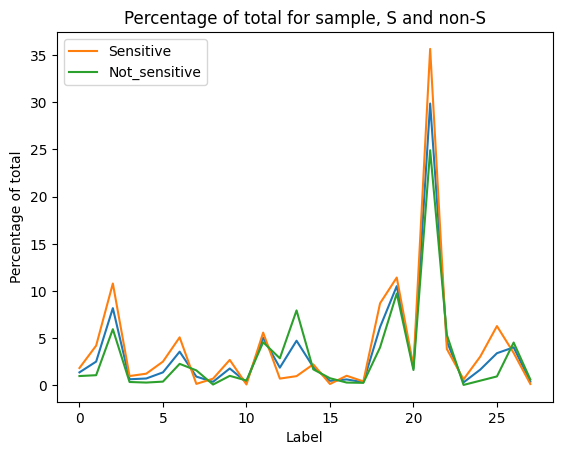

In [5]:
# Extract the data from the '%_S' column
labels = pd.to_numeric(result.index)
data = result['%_total']
data_S = result['%_S_total']
data_not_S = result['%_not_S_total']

# Create a bar plot
plt.plot(labels[:-1], data[:-1])
plt.plot(labels[:-1],data_S[:-1], label='Sensitive')
plt.plot(labels[:-1],data_not_S[:-1], label='Not_sensitive')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Percentage of total')
plt.title('Percentage of total for sample, S and non-S')
plt.legend()
# Show the plot
plt.show()

In [5]:
result_sorted = result.iloc[:-1].sort_values(by='diff_%_S_total', ascending=False)
result_sorted['original_label'] = result_sorted.index
result_sorted=result_sorted.reset_index(drop=True)
#result_sorted.reset_index(drop=True, inplace=True)
result_sorted

,total_count,%_total,|,S,%_S_total,diff_%_S_total,|,not_S,%_not_S_total,|,%_S_label,%_not_S_label,original_label
0,8285,29.86,|,4559,35.64,5.78,|,3726,24.91,|,55.0,45.0,21
1,948,3.42,|,805,6.29,2.87,|,143,0.96,|,85.0,15.0,25
2,2273,8.19,|,1382,10.80,2.61,|,891,5.96,|,61.0,39.0,2
3,1715,6.18,|,1113,8.70,2.52,|,602,4.03,|,65.0,35.0,18
4,703,2.53,|,540,4.22,1.69,|,163,1.09,|,77.0,23.0,1
5,994,3.58,|,652,5.10,1.52,|,342,2.29,|,66.0,34.0,6
6,467,1.68,|,391,3.06,1.38,|,76,0.51,|,84.0,16.0,24
7,386,1.39,|,324,2.53,1.14,|,62,0.41,|,84.0,16.0,5
8,2918,10.52,|,1462,11.43,0.91,|,1456,9.74,|,50.0,50.0,19
9,499,1.80,|,347,2.71,0.91,|,152,1.02,|,70.0,30.0,9


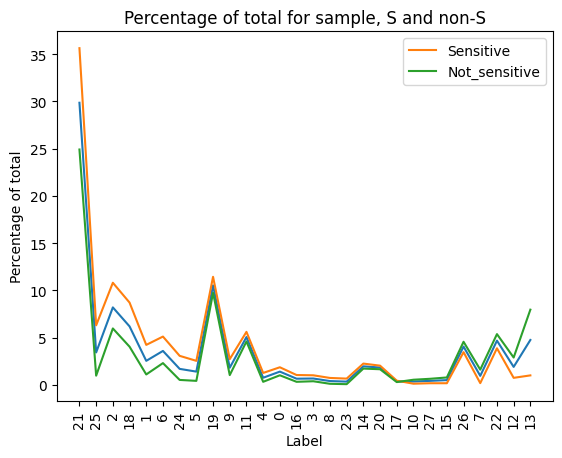

In [6]:
# Extract the data from the '%_S' column
labels_sorted = result_sorted['original_label']
#print(labels_sorted)
data = result_sorted['%_total']
data_S = result_sorted['%_S_total']
data_not_S = result_sorted['%_not_S_total']

# Create a bar plot
plt.plot(data)
plt.plot(data_S, label='Sensitive')
plt.plot(data_not_S, label='Not_sensitive')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Percentage of total')
#plt.xticks(labels_sorted)
plt.xticks(ticks=range(len(labels_sorted)), labels=labels_sorted, rotation=90)  # Rotate if there are many labels

plt.title('Percentage of total for sample, S and non-S')
plt.legend()
# Show the plot
plt.show()

**baseline Logistic regression on raw data**
---

In [7]:
# training logistic model
clf = LogisticRegression(random_state=0, max_iter=5000,verbose=1).fit(X_train, Y_train)
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)



In [ ]:
# predicting and assessing
Y_pred = clf.predict(X_test)
eval_scores, confusion_matrices_eval = gap_eval_scores(Y_pred, Y_test, S_test, metrics=['TPR'])
final_score = (eval_scores['macro_fscore']+ (1-eval_scores['TPR_GAP']))/2
print(final_score)

In [ ]:
eval scores

In [9]:
# Load the "true" test data
X_test_true = dat['X_test']
S_test_true = dat['S_test'] 
# Classify the provided test data with you classifier
y_test_true = clf.predict(X_test_true)
results_1=pd.DataFrame(y_test_true, columns= ['score'])

results_1.to_csv("Data_Challenge_MDI_341.csv", header = None, index = None)
# np.savetxt('y_test_challenge_student.txt', y_test, delimiter=',')

**SECOND METHOD**
---

In [10]:
X_sensitive = X[S==1]
X_non_sensitive = X[S!=1]
print(len(X_sensitive),len(X_non_sensitive),len(X)-len(X_sensitive)-len(X_non_sensitive))
X_sensitive_mean=X_sensitive.mean()
X_non_sensitive_mean=X_non_sensitive.mean()
diff_mean = X_sensitive_mean-X_non_sensitive_mean
diff_mean

X_debiased = X.copy()
X_debiased [S==1] -= diff_mean
X_debiaised_sensitive_mean = (X_debiased [S==1]).mean()

#print(X_sensitive_mean[:10])
#print(X_debiaised_sensitive_mean[:10])
#print(X_non_sensitive_mean[:10])

# Create DataFrame
compare = pd.DataFrame({'X_sensitive': X_sensitive_mean, 'Difference S/non S': diff_mean, 'X_debiaised': X_debiaised_sensitive_mean,'X_non_sensitive':X_non_sensitive_mean})
compare

12793 14956 0


,X_sensitive,Difference S/non S,X_debiaised,X_non_sensitive
0,-0.257521,0.146378,-0.403899,-0.403899
1,-0.134421,-0.247644,0.113223,0.113223
2,-0.554357,-0.068634,-0.485722,-0.485722
3,-0.586608,-0.153451,-0.433158,-0.433158
4,-0.051155,0.010707,-0.061861,-0.061861
...,...,...,...,...
763,0.119041,-0.142308,0.261349,0.261349
764,-0.230483,0.011593,-0.242076,-0.242076
765,0.176158,0.050037,0.126121,0.126121
766,0.273605,-0.188023,0.461628,0.461628


In [11]:
# Train the logistic regression
X_train, X_test, Y_train, Y_test, S_train, S_test = train_test_split(X_debiased, Y, S, test_size=0.3, random_state=42)
clf_2 = LogisticRegression(random_state=0, max_iter=5000).fit(X_train, Y_train)

In [17]:
Y_pred_2 = clf_2.predict(X_test)
eval_scores_2, confusion_matrices_eval_2 = gap_eval_scores(Y_pred_2, Y_test, S_test, metrics=['TPR'])
final_score = (eval_scores['macro_fscore']+ (1-eval_scores['TPR_GAP']))/2
print('final',final_score)
print('macro_fscore',eval_scores['macro_fscore'])
print('1-eval_scores',1-eval_scores['TPR_GAP'])

ValueError: Found input variables with inconsistent numbers of samples: [8325, 11893]

In [13]:
# Load the "true" test data
X_test = dat['X_test']
S_test = dat['S_test'] 

# Debiase X_test
X_test_debiased = X_test.copy()
X_test_debiased [S_test==1] -= diff_mean


# Classify the provided test data with you classifier
y_test = clf.predict(X_test_debiased)
results=pd.DataFrame(y_test, columns= ['score'])

results.to_csv("Data_Challenge_MDI_341_2.csv", header = None, index = None)
# np.savetxt('y_test_challenge_student.txt', y_test, delimiter=',')

**THIRD METHOD**
---

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy , CategoricalCrossentropy

from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import to_categorical

# Assuming X_train is your input embeddings and S is your sensitive attribute

# Input layer
input_layer = Input(shape=(768,))

# Main task classifier layers
main_task_hidden = Dense(256, activation='relu')(input_layer)
main_task_hidden = Dropout(0.5)(main_task_hidden)
main_task_output = Dense(28, activation='softmax', name='main_task_output')(main_task_hidden)

# Adversarial component layers
adversary_hidden = Dense(256, activation='relu')(main_task_hidden)
adversary_hidden = Dropout(0.5)(adversary_hidden)
adversarial_output = Dense(1, activation='sigmoid', name='adversarial_output')(adversary_hidden)

# Model
model_3 = Model(inputs=input_layer, outputs=[main_task_output, adversarial_output])

# Optimizers
#main_task_optimizer = Adam(learning_rate=0.001)
#adversarial_optimizer = Adam(learning_rate=0.001)

# Loss functions
main_task_loss = CategoricalCrossentropy()
adversarial_loss = BinaryCrossentropy()

# Compile the model
model_3.compile(optimizer=Adam(learning_rate=0.001),
              loss={'main_task_output': main_task_loss, 'adversarial_output': adversarial_loss},
              metrics={'main_task_output': ['accuracy'], 'adversarial_output': [AUC()]})

# Prepare the labels for the main task and the adversarial task
Y_main_task = to_categorical(Y_train, num_classes=28)#Y_train # Your main task labels
Y_adversary = S_train    # Your sensitive attribute labels

# check size on input .output
print(X_train.shape,Y_main_task.shape,Y_adversary.shape)

# Train the model
model_3.fit(X_train, {'main_task_output': Y_main_task, 'adversarial_output': Y_adversary}, epochs=10)

# After training, you can use the output of `main_task_hidden` as your new unbiased representation


2024-03-05 01:38:48.596942: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-05 01:38:48.636750: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 01:38:48.636778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 01:38:48.638297: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 01:38:48.648257: I tensorflow/core/platform/cpu_feature_guar

(19424, 768) (19424, 28) (19424,)
Epoch 1/10
607/607 [==============================] - 4s 5ms/step - loss: 1.4264 - main_task_output_loss: 1.3675 - adversarial_output_loss: 0.0589 - main_task_output_accuracy: 0.6115 - adversarial_output_auc: 0.9973
Epoch 2/10
607/607 [==============================] - 3s 5ms/step - loss: 1.0216 - main_task_output_loss: 0.9858 - adversarial_output_loss: 0.0358 - main_task_output_accuracy: 0.7004 - adversarial_output_auc: 0.9981
Epoch 3/10
607/607 [==============================] - 3s 6ms/step - loss: 0.9279 - main_task_output_loss: 0.8966 - adversarial_output_loss: 0.0313 - main_task_output_accuracy: 0.7265 - adversarial_output_auc: 0.9986
Epoch 4/10
607/607 [==============================] - 3s 5ms/step - loss: 0.8720 - main_task_output_loss: 0.8447 - adversarial_output_loss: 0.0273 - main_task_output_accuracy: 0.7425 - adversarial_output_auc: 0.9989
Epoch 5/10
607/607 [==============================] - 3s 4ms/step - loss: 0.8343 - main_task_output_lo

In [5]:
# Step 1: Transform X_train and X_test
feature_extractor_3 = Model(inputs=model_3.input, outputs=main_task_hidden)
X_train_transformed_3 = feature_extractor_3.predict(X_train)
X_test_transformed_3 = feature_extractor_3.predict(X_test)

# Step 2: Train a new classifier on the transformed training data
new_classifier_3 = LogisticRegression(max_iter=10000)  # Increase max_iter if needed for convergence
history_new_3 = new_classifier_3.fit(X_train_transformed_3, Y_train)  # Y_train are your original training labels

# Step 3: Predict on the transformed test data and evaluate
Y_pred_3 = new_classifier_3.predict(X_test_transformed_3)
accuracy_3= accuracy_score(Y_test, Y_pred_3)  # Y_test are your original test labels
print(f"Accuracy on transformed test data: {accuracy_3}")

261/261 [==============================] - 1s 2ms/step
Accuracy on transformed test data: 0.7716516516516516


In [8]:
Y_pred_3
#eval_scores, confusion_matrices_eval = gap_eval_scores(Y_pred_3, Y_test, S_test, metrics=['TPR'])
#eval_scores#eval_scores['macro_fscore']
#eval_scores['TPR_GAP']
'''final_score = (eval_scores['macro_fscore']+ (1-eval_scores['TPR_GAP']))/2
print('macro_fscore',eval_scores['macro_fscore'])
print('1-eval_scores',1-eval_scores['TPR_GAP'])
print('final score (average)',final_score)'''

"final_score = (eval_scores['macro_fscore']+ (1-eval_scores['TPR_GAP']))/2\nprint('macro_fscore',eval_scores['macro_fscore'])\nprint('1-eval_scores',1-eval_scores['TPR_GAP'])\nprint('final score (average)',final_score)"

In [ ]:
# Load the "true" test data
X_test_true = dat['X_test']
S_test_true = dat['S_test'] 

X_test_true_transformed_3 = feature_extractor_3.predict(X_test_true)

# Classify the provided test data with you classifier
y_test_true = clf.predict(X_test_true_transformed_3)
results_3=pd.DataFrame(y_test_true, columns= ['score'])

results_3.to_csv("Data_Challenge_MDI_341_3.csv", header = None, index = None)
# np.savetxt('y_test_challenge_student.txt', y_test, delimiter=',')

**4th METHOD**
---

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy , CategoricalCrossentropy

from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import to_categorical

# Assuming X_train is your input embeddings and S is your sensitive attribute

# Input layer
input_layer = Input(shape=(512,))

# Main task classifier layers
main_task_hidden = Dense(512, activation='relu')(input_layer)
main_task_hidden = Dropout(0.5)(main_task_hidden)
main_task_output = Dense(28, activation='softmax', name='main_task_output')(main_task_hidden)

# Adversarial component layers
adversary_hidden = Dense(768, activation='relu')(main_task_hidden)
adversary_hidden = Dropout(0.5)(adversary_hidden)
adversarial_output = Dense(1, activation='sigmoid', name='adversarial_output')(adversary_hidden)

# Model
model_4 = Model(inputs=input_layer, outputs=[main_task_output, adversarial_output])

# Optimizers
#main_task_optimizer = Adam(learning_rate=0.001)
#adversarial_optimizer = Adam(learning_rate=0.001)

# Loss functions
main_task_loss = CategoricalCrossentropy()
adversarial_loss = BinaryCrossentropy()

# Compile the model
model_4.compile(optimizer=Adam(learning_rate=0.001),
              loss={'main_task_output': main_task_loss, 'adversarial_output': adversarial_loss},
              metrics={'main_task_output': ['accuracy'], 'adversarial_output': [AUC()]})

# Prepare the labels for the main task and the adversarial task
Y_main_task = to_categorical(Y_train, num_classes=28)#Y_train # Your main task labels
Y_adversary = S_train    # Your sensitive attribute labels

# check size on input .output
print(X_train.shape,Y_main_task.shape,Y_adversary.shape)

# Train the model
model_4.fit(X_train, {'main_task_output': Y_main_task, 'adversarial_output': Y_adversary}, epochs=10)

# After training, you can use the output of `main_task_hidden` as your new unbiased representation


(19424, 768) (19424, 28) (19424,)
Epoch 1/10


ValueError: in user code:

    File "/home/anaele/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/anaele/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/anaele/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/anaele/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/anaele/myenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/anaele/myenv/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_3" is incompatible with the layer: expected shape=(None, 512), found shape=(32, 768)


In [14]:
# Step 1: Transform X_train and X_test
feature_extractor_4 = Model(inputs=model_4.input, outputs=main_task_hidden)
X_train_transformed_4 = feature_extractor_4.predict(X_train)
X_test_transformed_4 = feature_extractor_4.predict(X_test)

# Step 2: Train a new classifier on the transformed training data
new_classifier_4 = LogisticRegression(max_iter=10000)  # Increase max_iter if needed for convergence
history_4 = new_classifier_4.fit(X_train_transformed_4, Y_train)  # Y_train are your original training labels

# Step 3: Predict on the transformed test data and evaluate
Y_pred_4 = new_classifier_4.predict(X_test_transformed_4)
accuracy_4 = accuracy_score(Y_test, Y_pred_4)  # Y_test are your original test labels
print(f"Accuracy on transformed test data: {accuracy_4}")

ValueError: in user code:

    File "/home/anaele/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/home/anaele/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/anaele/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/home/anaele/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/home/anaele/myenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/anaele/myenv/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_4" is incompatible with the layer: expected shape=(None, 512), found shape=(32, 768)


In [15]:
eval_scores, confusion_matrices_eval = gap_eval_scores(Y_pred_4, Y_test, S_test, metrics=['TPR'])
#eval_scores#eval_scores['macro_fscore']
#eval_scores['TPR_GAP']
final_score = (eval_scores['macro_fscore']+ (1-eval_scores['TPR_GAP']))/2
print(final_score)

NameError: name 'Y_pred_4' is not defined

In [ ]:
# Load the "true" test data
X_test_true = dat['X_test']
S_test_true = dat['S_test'] 

X_test_true_transformed_4 = feature_extractor_4.predict(X_test_true)

# Classify the provided test data with you classifier
y_test_true = clf.predict(X_test_true_transformed_4)
results_4=pd.DataFrame(y_test_true, columns= ['score'])

results_4.to_csv("Data_Challenge_MDI_341_4.csv", header = None, index = None)
# np.savetxt('y_test_challenge_student.txt', y_test, delimiter=',')